In [42]:
import math
import scipy.special
import pandas as pd
import numpy as np
from collections import deque
from itertools import combinations
from typing import Union

def toStr(vec) -> str:
    return ''.join(map(str, vec))

def countOnes(vec) -> int:
    return vec.count(1)

def toInt(vec) -> int:
    return int("".join(str(i) for i in vec), 2)

def toBinVec(x, l=0) -> list:
    result = [int(i) for i in bin(x)[2:]]
    missing_zeros = l-len(result)
    if (missing_zeros > 0):
        for i in range(missing_zeros):
            result.insert(0, 0)
    return result

def binary_permutations(lst: []) -> [[]]:
    result = []
    for comb in combinations(range(len(lst)), lst.count(1)):
        permutation = [0] * len(lst)
        for i in comb:
            permutation[i] = 1
        result.append(permutation)
    return result

def rotate_left_vec(vec, l) -> list:
    shifted = vec.copy()
    temp = deque(shifted)
    temp.rotate(-1)
    return list(temp)

def rotate_left(x, r, l) -> int:
    return (x*2**r) % (2**l-1)

def rotate_right(x, r, l) -> int:
    return rotate_left(x, l-(r % l), l)

def find_min_max(vec) -> Union[int,int,list,list]:
    L = len(vec)
    vecToInt = toInt(vec)
    min = vecToInt
    max = 0
    vec_min = vec
    vec_max = vec
    shifted = vec.copy()
    for i in range(L):
        if vecToInt < min:
            min = vecToInt
            vec_min = shifted
        if vecToInt > max:
            max = vecToInt
            vec_max = shifted
        temp = deque(shifted)
        temp.rotate(-1)
        shifted = list(temp)
        vecToInt = toInt(shifted)
    return min, max, vec_min, vec_max

def find_rotational_distance(vec1, vec2) -> Union[int,int]:
    L = len(vec1)
    vec1ToInt = toInt(vec1)
    vec2ToInt = toInt(vec2)
    left_shifts = 0
    shifted = vec1.copy()
    for i in range(L):
        if toInt(shifted) == vec2ToInt:
            left_shifts = i
            break
        temp = deque(shifted)
        temp.rotate(-1)
        shifted = list(temp)
    return left_shifts, L-left_shifts

def calculate_c(n: int, U: int) -> int:
    return 2**n-3**U

def calculate_z(parity_vector: []) -> int:
    indices = []
    for i, entry in enumerate(parity_vector, start=0):
        if entry == 1:
            indices.append(i)
    result = 0
    U = len(indices)
    for i, entry in enumerate(indices, start=0):
        result = result + 3**(U-(i+1)) * 2**(entry)
    return result

def z_inverse(z, l) -> int:
    i = 1
    while True:
        vec = toBinVec(i, l)
        if calculate_z(vec) == z and len(vec) == l:
            return i
        i += 1

def calculate_M(n: int, U: int) -> Union[int,pd.DataFrame]:
    if n == 0 or U == 0 or n < U:
        return 0, None
    df = pd.DataFrame(columns = ['parity_vector', 'shifted orbits', 'z vals', 'min_z'])
    p_v = [0] * n
    for i in range(U):
        p_v[i] = 1
    permutations = binary_permutations(p_v)
    for i in range(len(permutations)):
        vec = permutations[i]
        z_vals = []
        shifted_vecs = []
        shifted = vec.copy()
        for j in range(len(shifted)):
            shifted_vecs.append(''.join(map(str, shifted)))
            z_vals.append(calculate_z(shifted))
            temp = deque(shifted)
            temp.rotate(-1)
            shifted = list(temp)
        min_z_vals = min(z_vals) if len(z_vals) > 0 else 0
        df.loc[i] = [''.join(map(str, vec)), shifted_vecs, z_vals, min_z_vals]
    return df['min_z'].max(), df

def calculate_N(M:int, n:int, U:int) -> int:
    if M == 0:
        return 0
    r = math.gcd(n, U)
    sum = 0
    for i in range(r):
        sum += 2**(i*n/r)*3**(U-1-i*U/r)
    return 2*M - int(sum)

def generate_df(vecs: [[]]) -> pd.DataFrame:
    df = pd.DataFrame(columns = ['vec', 'L (len)', 'N (1s)', 'min', 'max', 'vec_min', 'vec_max', 'rot_left', 'quot=(N*rot+1)/L'])
    for i in range(len(vecs)):
        vec = vecs[i]
        L = len(vec)
        min, max, vec_min, vec_max = find_min_max(vec)
        rot_dist_left, rot_dist_right = find_rotational_distance(vec_min, vec_max)
        quot = (countOnes(vec)*rot_dist_left+1)/L
        df.loc[i] = [toStr(vec), L, countOnes(vec), min, max, toStr(vec_min), toStr(vec_max), rot_dist_left, quot]
    return df

print(len(binary_permutations([1,1,1,1,1,0,0,0,0,0,0])))
print(scipy.special.binom(5, 3))

#n=17
#U=7
n=14
U=8
M, df_M = calculate_M(n, U)
N = calculate_N(M, n, U)
c = calculate_c(n, U)
print("M({0},{1})={2}".format(n, U, M))
print("N({0},{1})={2}".format(n, U, N))
print("c={0}".format(c))

#df.head(100)


462
10.0
M(14,8)=21109
N(14,8)=36575
c=9823


In [58]:
#L=17,U=7 works: toStr(toBinVec(z_inv))=10101001010010100 (vec_max)
#L=5,U=2 works: toStr(toBinVec(z_inv))=10100 (vec_max)
#L=8,U=5 works: toStr(toBinVec(z_inv))=11011010 (vec_max)
#L=12,U=7 works: toStr(toBinVec(z_inv))=110101101010 (vec_max)

L=8
U=5
M, df_m = calculate_M(L, U)
N = calculate_N(M, L, U)
#z_inv = z_inverse(M, L)
#print(toStr(toBinVec(z_inv)))
z_inv = z_inverse(N, L)
print(toStr(rotate_left(x, r, l)))


10101101


In [57]:
#should bring 130
#print(rotate_left(5,7,8))
#should bring 21141
#print(rotate_left(86676,5,17))
#print(rotate_right(86676,12,17))
#should bring 86676
#print(rotate_left(21141,12,17))

vecs=[
    [1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0],
    [1,0,1,0,0],
    [1,0,1,1,0,1,0,1],
    [1,1,0,1,0,1,1,0,1,0,1,0],
    [0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1]
    ]

L=8
U=5
M, df_m = calculate_M(L,U)
N = calculate_N(M, L, U)
c = calculate_c(L,U)
print("M={0} N={1} c={2}".format(M,N,c))

df = generate_df(vecs)
df.head()

M=319 N=557 c=13


,vec,L (len),N (1s),min,max,vec_min,vec_max,rot_left,quot=(N*rot+1)/L
0,10101001010010100,17,7,21141,86676,00101001010010101,10101001010010100,12,5.0
1,10100,5,2,5,20,00101,10100,2,1.0
2,10110101,8,5,91,218,01011011,11011010,3,2.0
3,110101101010,12,7,1387,3434,010101101011,110101101010,5,3.0
4,0101101010110101101010110101011,31,18,727102827,1800844650,0101011010101101011010101101011,1101011010101101011010101101010,12,7.0


In [11]:
max_n=5
data = np.empty((0, 4), int)
for x in range(max_n):
    data_n = np.empty((0, 4), int)
    for y in range(max_n):
        M, df = calculate_M(x, y)
        N = calculate_N(M, x, y)
        data_n = np.append(data_n, np.array([[x, y, M, N]]), axis=0)
    data=np.append(data, data_n, axis=0)

columns = ['x', 'y', 'M', 'N']
df = pd.DataFrame(data, columns=columns)
df.to_csv('c:/temp/collatz_M_N.csv', index=False)

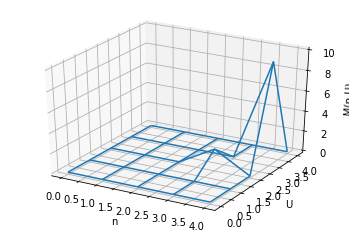

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

max_n = 5
x = np.linspace(0, max_n-1, max_n)
y = np.linspace(0, max_n-1, max_n)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max_n, max_n))

def fn_plot_M(x, y):
    M, df = calculate_M(x, y)
    N = calculate_N(M, x, y)
    return N-M

fn_vectorized_M = np.vectorize(fn_plot_M)
Z_M = fn_vectorized_M(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z_M)
ax.set_xlabel('n')
ax.set_ylabel('U')
ax.set_zlabel('M(n,U)')
plt.show()